# Setup

In [ ]:
import os
import random
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import spacy
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import re
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
import joblib
from itertools import product
from mpl_toolkits.mplot3d import Axes3D


nltk.download('punkt')
nltk.download('stopwords')


[nltk_data] Downloading package punkt to /usr/share/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

# Data Preprocessing

In [ ]:



nlp = spacy.load('en_core_web_sm')

stop_words = set(stopwords.words('english')) - {'no', 'not'}


contraction_mapping = {
    "ain't": "is not",
    "aren't": "are not",
    "can't": "cannot",
    "can't've": "cannot have",
    "'cause": "because",
    "could've": "could have",
    "couldn't": "could not",
    "couldn't've": "could not have",
    "didn't": "did not",
    "doesn't": "does not",
    "don't": "do not",
    "hadn't": "had not",
    "hadn't've": "had not have",
    "hasn't": "has not",
    "haven't": "have not",
    "he'd": "he would",
    "he'd've": "he would have",
    "he'll": "he will",
    "he'll've": "he will have",
    "he's": "he is",
    "how'd": "how did",
    "how'd'y": "how do you",
    "how'll": "how will",
    "how's": "how is",
    "i'd": "i would",
    "i'd've": "i would have",
    "i'll": "i will",
    "i'll've": "i will have",
    "i'm": "i am",
    "i've": "i have",
    "isn't": "is not",
    "it'd": "it would",
    "it'd've": "it would have",
    "it'll": "it will",
    "it'll've": "it will have",
    "it's": "it is",
    "let's": "let us",
    "ma'am": "madam",
    "mayn't": "may not",
    "might've": "might have",
    "mightn't": "might not",
    "mightn't've": "might not have",
    "must've": "must have",
    "mustn't": "must not",
    "mustn't've": "must not have",
    "needn't": "need not",
    "needn't've": "need not have",
    "o'clock": "of the clock",
    "oughtn't": "ought not",
    "oughtn't've": "ought not have",
    "shan't": "shall not",
    "sha'n't": "shall not",
    "shan't've": "shall not have",
    "she'd": "she would",
    "she'd've": "she would have",
    "she'll": "she will",
    "she'll've": "she will have",
    "she's": "she is",
    "should've": "should have",
    "shouldn't": "should not",
    "shouldn't've": "should not have",
    "so've": "so have",
    "so's": "so as",
    "that'd": "that would",
    "that'd've": "that would have",
    "that's": "that is",
    "there'd": "there would",
    "there'd've": "there would have",
    "there's": "there is",
    "they'd": "they would",
    "they'd've": "they would have",
    "they'll": "they will",
    "they'll've": "they will have",
    "they're": "they are",
    "they've": "they have",
    "to've": "to have",
    "wasn't": "was not",
    "we'd": "we would",
    "we'd've": "we would have",
    "we'll": "we will",
    "we'll've": "we will have",
    "we're": "we are",
    "we've": "we have",
    "weren't": "were not",
    "what'll": "what will",
    "what'll've": "what will have",
    "what're": "what are",
    "what's": "what is",
    "what've": "what have",
    "when's": "when is",
    "when've": "when have",
    "where'd": "where did",
    "where's": "where is",
    "where've": "where have",
    "who'll": "who will",
    "who'll've": "who will have",
    "who's": "who is",
    "who've": "who have",
    "why's": "why is",
    "why've": "why have",
    "will've": "will have",
    "won't": "will not",
    "won't've": "will not have",
    "would've": "would have",
    "wouldn't": "would not",
    "wouldn't've": "would not have",
    "y'all": "you all",
    "y'alls": "you alls",
    "y'all'd": "you all would",
    "y'all'd've": "you all would have",
    "y'all're": "you all are",
    "y'all've": "you all have",
    "you'd": "you would",
    "you'd've": "you would have",
    "you'll": "you will",
    "you'll've": "you will have",
    "you're": "you are",
    "you've": "you have"
}


def preprocess_text(text):

    text = text.lower()

    text = ' '.join([contraction_mapping.get(word, word) for word in text.split()])

    text = re.sub(r'http\S+', '', text)

    text = re.sub(r'[^a-zA-Z\s]', '', text)

    tokens = word_tokenize(text)

    tokens = [token.lemma_ for token in nlp(" ".join(tokens))]

    tokens = [token for token in tokens if token not in stop_words]
    return ' '.join(tokens)



# Loading Data

In [ ]:
review_dataset_path = "/kaggle/input/movie-review/txt_sentoken"

print(os.listdir(review_dataset_path))

pos_review_folder_path = os.path.join(review_dataset_path, "pos")
neg_review_folder_path = os.path.join(review_dataset_path, "neg")

pos_review_file_names = os.listdir(pos_review_folder_path)
neg_review_file_names = os.listdir(neg_review_folder_path)


['pos', 'neg']


# Functions

In [ ]:

def load_text_from_textfile(path):
    with open(path, "r") as file:
        return file.read()

def get_data_target(folder_path, file_names, review_type):
    data = [preprocess_text(load_text_from_textfile(os.path.join(folder_path, file_name))) for file_name in file_names]
    target = [review_type] * len(data)
    return data, target

# Data Preparation

In [ ]:
pos_data, pos_target = get_data_target(pos_review_folder_path, pos_review_file_names, "positive")
neg_data, neg_target = get_data_target(neg_review_folder_path, neg_review_file_names, "negative")

data = pos_data + neg_data
target_ = pos_target + neg_target

combined = list(zip(data, target_))
random.shuffle(combined)
data[:], target_[:] = zip(*combined)



In [ ]:
sample_indices = random.sample(range(len(data)), 5) 

for i in sample_indices:
    print("Review:", data[i])
    print("Target:", target_[i])
    print("="*50)


Review: I know last summer first highprofile slasher thriller release scream write screenwrit kevin williamson stylish effective horror film become big hit fall season scream knowing film genre I know last summer reminiscent straightforward slasher flick far intelligent bottomofthebarrel guilty pleasure nine friday th film well okay jason go hell pure hell sit film start four talented aspire teenage friend graduate high school small boat town southport n c th july soon head separate way kindhearte julie jennifer love hewitt outsider ray freddie prinze jr head college helen sarah michelle gellar honor croaker queen town ignorant jock boyfriend barry ryan phillippe go new york become actress football player four travel nearby mountainside beach evening dismay hit man road way home distraught confused decide not go police charge manslaughter devise plan throw apparently dead victim peer ocean hope no one find julie apprehensive force barry switch exactly year later julie still unable come

# Text Vectorization

In [ ]:


X_train, X_test, y_train, y_test = train_test_split(data, target_, test_size=0.2, random_state=42)

tfidf_vectorizer = TfidfVectorizer(max_features=5000)

X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)


# Model Training and Evaluation

In [ ]:

svm_model = SVC(C=8, gamma=0.1, kernel='rbf')
svm_model.fit(X_train_tfidf, y_train)

y_train_pred_svm = svm_model.predict(X_train_tfidf)
accuracy_train_svm = accuracy_score(y_train, y_train_pred_svm)
print("Train Accuracy (SVM):", accuracy_train_svm)

y_test_pred_svm = svm_model.predict(X_test_tfidf)
accuracy_test_svm = accuracy_score(y_test, y_test_pred_svm)
print("Test Accuracy (SVM):", accuracy_test_svm)

print(f"Train Accuracy (SVM): {accuracy_train_svm:.2f}")
print(f"Test Accuracy (SVM): {accuracy_test_svm:.2f}")



Train Accuracy (SVM): 0.995
Test Accuracy (SVM): 0.875
Train Accuracy (SVM): 0.99
Test Accuracy (SVM): 0.88


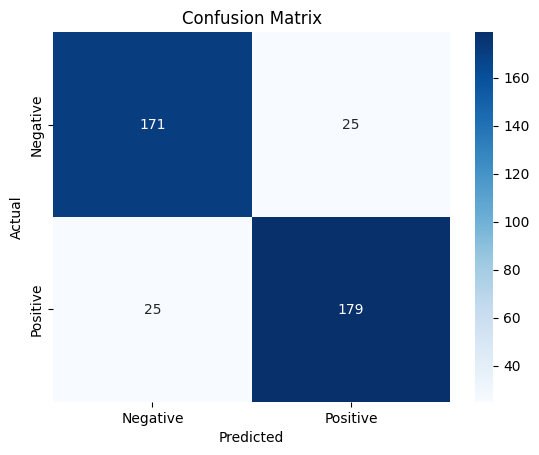

In [ ]:

cm = confusion_matrix(y_test, y_test_pred_svm)

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


In [ ]:


param_grid = {
    'C': [1, 2, 4, 8],
    'gamma': [0.1, 0.01, 0.001],
    'kernel': ['rbf', 'linear', 'poly']
}

C_values = []
gamma_values = []
kernel_values = []
accuracy_scores = []

best_accuracy = 0
best_model = None

for params in product(*param_grid.values()):
    C, gamma, kernel = params

    svm_model = SVC(C=C, gamma=gamma, kernel=kernel)
    svm_model.fit(X_train_tfidf, y_train)

    y_test_pred_svm = svm_model.predict(X_test_tfidf)
    accuracy_test_svm = accuracy_score(y_test, y_test_pred_svm)

    print(f"C={C}, gamma={gamma}, kernel={kernel}: Test Accuracy = {accuracy_test_svm:.2f}")

    C_values.append(C)
    gamma_values.append(gamma)
    kernel_values.append(kernel)
    accuracy_scores.append(accuracy_test_svm)

    if accuracy_test_svm > best_accuracy:
        best_accuracy = accuracy_test_svm
        best_model = svm_model

joblib.dump(best_model, 'best_svm_model.joblib')
print(f"Best model saved with accuracy: {best_accuracy:.2f}")


C=1, gamma=0.1, kernel=rbf: Test Accuracy = 0.81
C=1, gamma=0.1, kernel=linear: Test Accuracy = 0.87
C=1, gamma=0.1, kernel=poly: Test Accuracy = 0.49
C=1, gamma=0.01, kernel=rbf: Test Accuracy = 0.49
C=1, gamma=0.01, kernel=linear: Test Accuracy = 0.87
C=1, gamma=0.01, kernel=poly: Test Accuracy = 0.49
C=1, gamma=0.001, kernel=rbf: Test Accuracy = 0.49
C=1, gamma=0.001, kernel=linear: Test Accuracy = 0.87
C=1, gamma=0.001, kernel=poly: Test Accuracy = 0.49
C=2, gamma=0.1, kernel=rbf: Test Accuracy = 0.85
C=2, gamma=0.1, kernel=linear: Test Accuracy = 0.86
C=2, gamma=0.1, kernel=poly: Test Accuracy = 0.49
C=2, gamma=0.01, kernel=rbf: Test Accuracy = 0.49
C=2, gamma=0.01, kernel=linear: Test Accuracy = 0.86
C=2, gamma=0.01, kernel=poly: Test Accuracy = 0.49
C=2, gamma=0.001, kernel=rbf: Test Accuracy = 0.49
C=2, gamma=0.001, kernel=linear: Test Accuracy = 0.86
C=2, gamma=0.001, kernel=poly: Test Accuracy = 0.49
C=4, gamma=0.1, kernel=rbf: Test Accuracy = 0.86
C=4, gamma=0.1, kernel=line

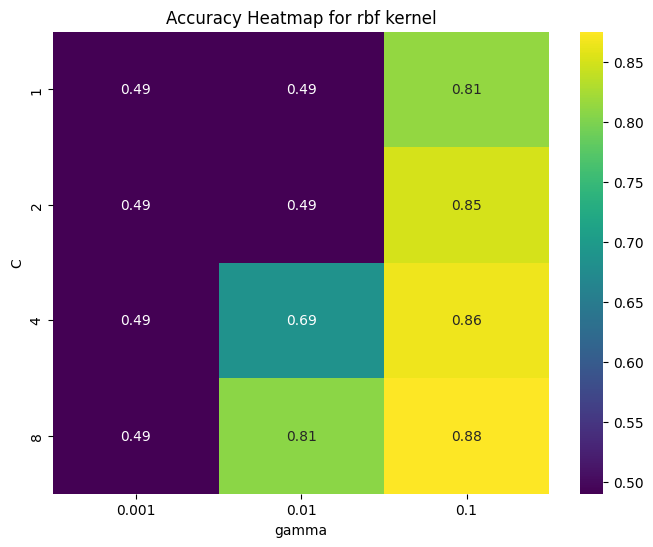

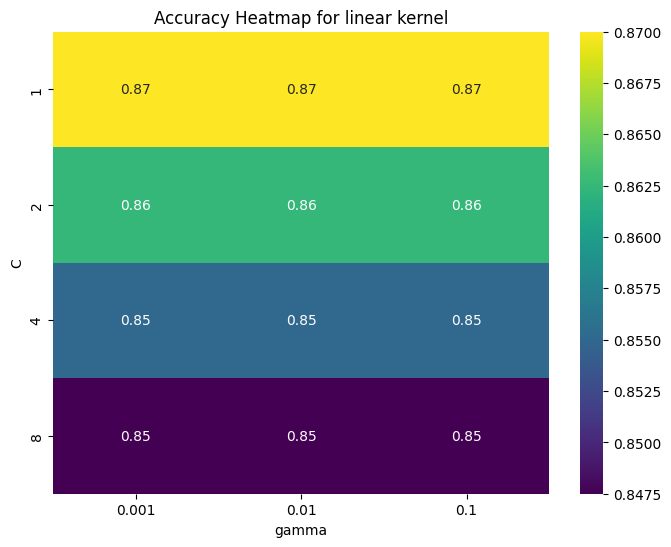

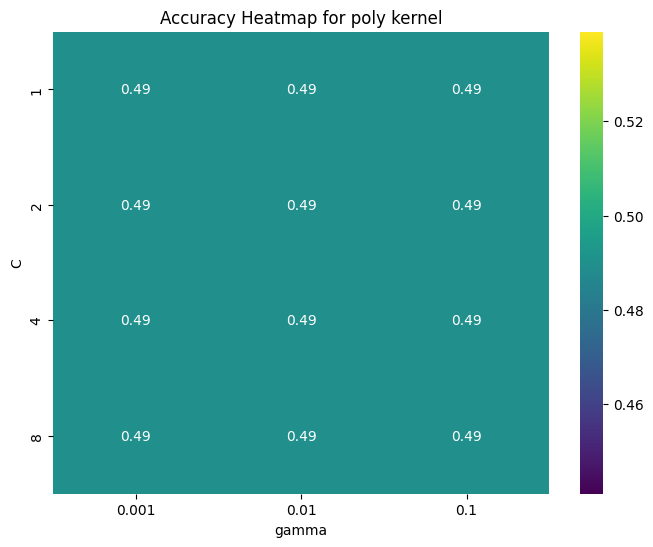

In [ ]:
results = pd.DataFrame({
    'C': C_values,
    'gamma': gamma_values,
    'kernel': kernel_values,
    'accuracy': accuracy_scores
})

for kernel in param_grid['kernel']:
    kernel_results = results[results['kernel'] == kernel]
    pivot_table = kernel_results.pivot(index='C', columns='gamma', values='accuracy')

    plt.figure(figsize=(8, 6))
    sns.heatmap(pivot_table, annot=True, fmt=".2f", cmap="viridis")
    plt.title(f'Accuracy Heatmap for {kernel} kernel')
    plt.xlabel('gamma')
    plt.ylabel('C')
    plt.show()



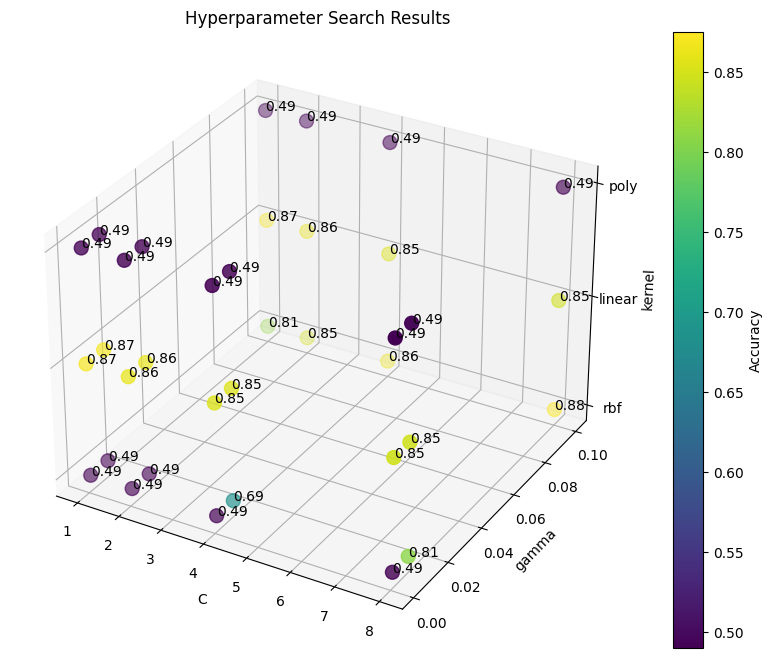

In [ ]:

kernel_map = {'rbf': 0, 'linear': 1, 'poly': 2}
results['kernel_num'] = results['kernel'].map(kernel_map)

fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

sc = ax.scatter(results['C'], results['gamma'], results['kernel_num'], c=results['accuracy'], cmap='viridis', s=100)
plt.colorbar(sc, ax=ax, label='Accuracy')

ax.set_xlabel('C')
ax.set_ylabel('gamma')
ax.set_zlabel('kernel')

ax.set_zticks(list(kernel_map.values()))
ax.set_zticklabels(list(kernel_map.keys()))

for i, row in results.iterrows():
    ax.text(row['C'], row['gamma'], row['kernel_num'], f'{row["accuracy"]:.2f}', color='black', fontsize=10)

plt.title('Hyperparameter Search Results')
plt.show()

In [ ]:


best_model = joblib.load('best_svm_model.joblib')

sample_review = "This movie is bored! I hate every minute of it."

sample_review_tfidf = tfidf_vectorizer.transform([sample_review])

predicted_sentiment = best_model.predict(sample_review_tfidf)

print("Predicted Sentiment:", predicted_sentiment)


Predicted Sentiment: ['negative']


n_estimators=100, max_depth=None, min_samples_split=2, min_samples_leaf=1: Test Accuracy = 0.81
n_estimators=100, max_depth=None, min_samples_split=2, min_samples_leaf=2: Test Accuracy = 0.83
n_estimators=100, max_depth=None, min_samples_split=2, min_samples_leaf=4: Test Accuracy = 0.82
n_estimators=100, max_depth=None, min_samples_split=5, min_samples_leaf=1: Test Accuracy = 0.84
n_estimators=100, max_depth=None, min_samples_split=5, min_samples_leaf=2: Test Accuracy = 0.82
n_estimators=100, max_depth=None, min_samples_split=5, min_samples_leaf=4: Test Accuracy = 0.82
n_estimators=100, max_depth=None, min_samples_split=10, min_samples_leaf=1: Test Accuracy = 0.81
n_estimators=100, max_depth=None, min_samples_split=10, min_samples_leaf=2: Test Accuracy = 0.82
n_estimators=100, max_depth=None, min_samples_split=10, min_samples_leaf=4: Test Accuracy = 0.85
n_estimators=100, max_depth=10, min_samples_split=2, min_samples_leaf=1: Test Accuracy = 0.82
n_estimators=100, max_depth=10, min_sam

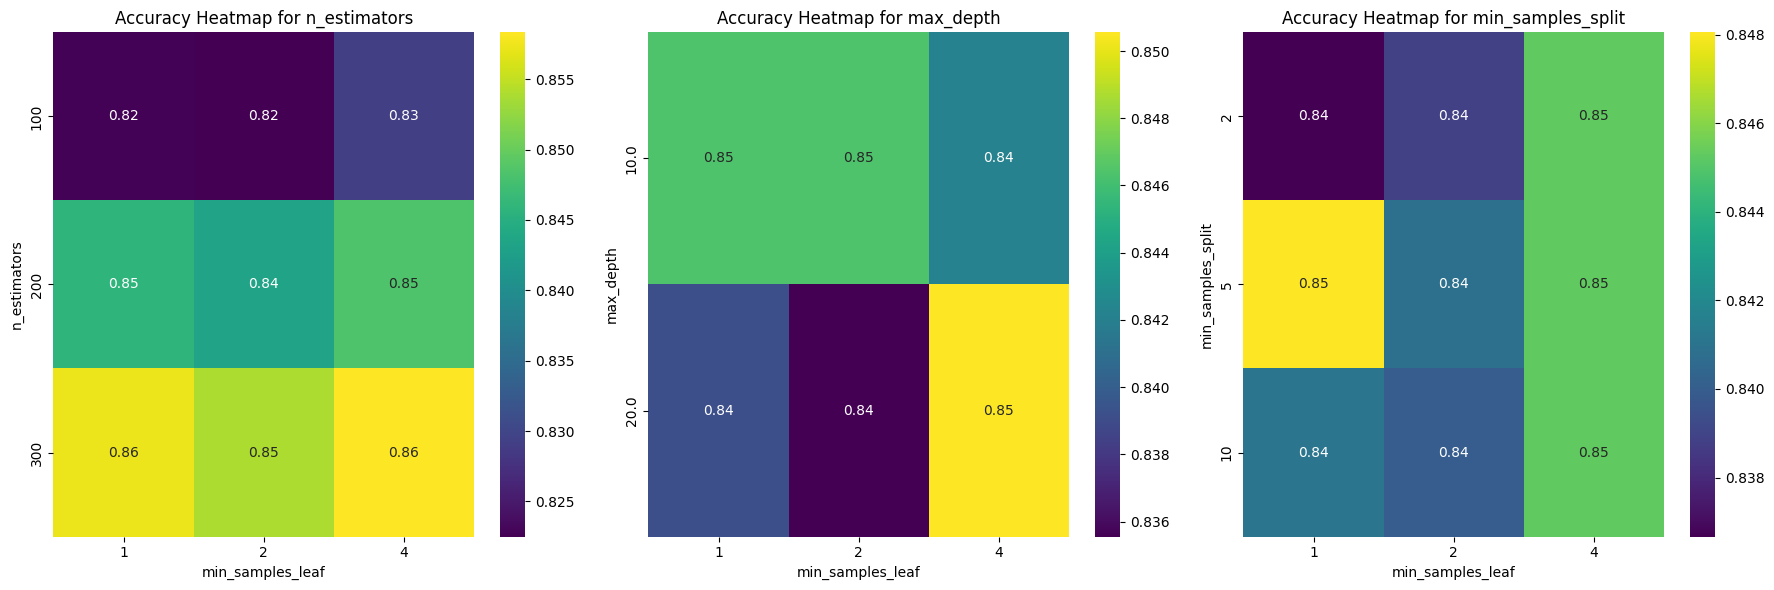

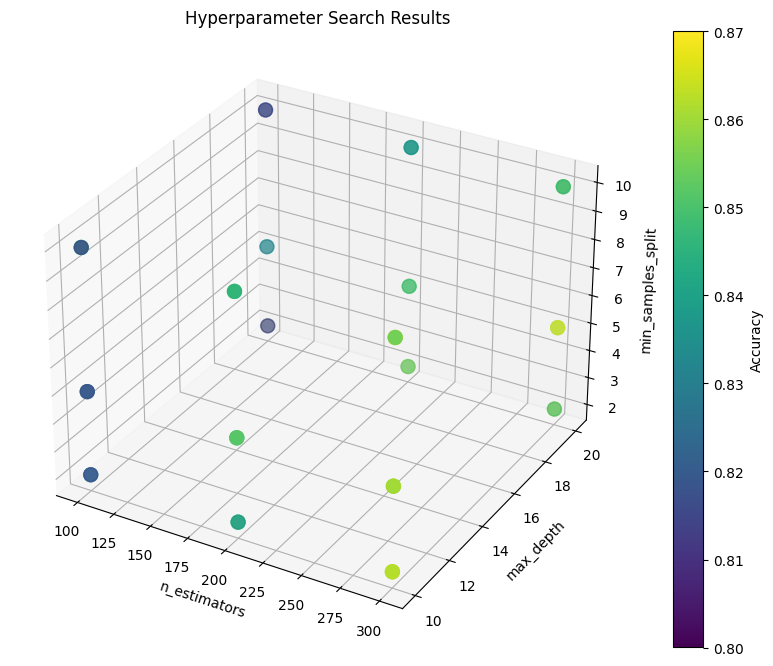

In [ ]:

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

n_estimators_values = []
max_depth_values = []
min_samples_split_values = []
min_samples_leaf_values = []
accuracy_scores = []

best_accuracy = 0
best_model = None

for params in product(*param_grid.values()):
    n_estimators, max_depth, min_samples_split, min_samples_leaf = params

    rf_model = RandomForestClassifier(n_estimators=n_estimators,
                                       max_depth=max_depth,
                                       min_samples_split=min_samples_split,
                                       min_samples_leaf=min_samples_leaf,
                                       random_state=42) 
    rf_model.fit(X_train_tfidf, y_train)

    y_test_pred_rf = rf_model.predict(X_test_tfidf)
    accuracy_test_rf = accuracy_score(y_test, y_test_pred_rf)

    print(f"n_estimators={n_estimators}, max_depth={max_depth}, min_samples_split={min_samples_split}, min_samples_leaf={min_samples_leaf}: Test Accuracy = {accuracy_test_rf:.2f}")

    n_estimators_values.append(n_estimators)
    max_depth_values.append(max_depth)
    min_samples_split_values.append(min_samples_split)
    min_samples_leaf_values.append(min_samples_leaf)
    accuracy_scores.append(accuracy_test_rf)

    if accuracy_test_rf > best_accuracy:
        best_accuracy = accuracy_test_rf
        best_model = rf_model

joblib.dump(best_model, 'best_rf_model.joblib')
print(f"Best model saved with accuracy: {best_accuracy:.2f}")

results = pd.DataFrame({
    'n_estimators': n_estimators_values,
    'max_depth': max_depth_values,
    'min_samples_split': min_samples_split_values,
    'min_samples_leaf': min_samples_leaf_values,
    'accuracy': accuracy_scores
})

fig, axes = plt.subplots(1, 3, figsize=(18, 6))
for i, param in enumerate(['n_estimators', 'max_depth', 'min_samples_split']):
    pivot_table = results.pivot_table(index=param, columns='min_samples_leaf', values='accuracy')
    sns.heatmap(pivot_table, annot=True, fmt=".2f", cmap="viridis", ax=axes[i])
    axes[i].set_title(f'Accuracy Heatmap for {param}')
    axes[i].set_xlabel('min_samples_leaf')
    axes[i].set_ylabel(param)
plt.tight_layout()
plt.show()

fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
sc = ax.scatter(results['n_estimators'], results['max_depth'], results['min_samples_split'],
                c=results['accuracy'], cmap='viridis', s=100)
plt.colorbar(sc, ax=ax, label='Accuracy')
ax.set_xlabel('n_estimators')
ax.set_ylabel('max_depth')
ax.set_zlabel('min_samples_split')
plt.title('Hyperparameter Search Results')
plt.show()


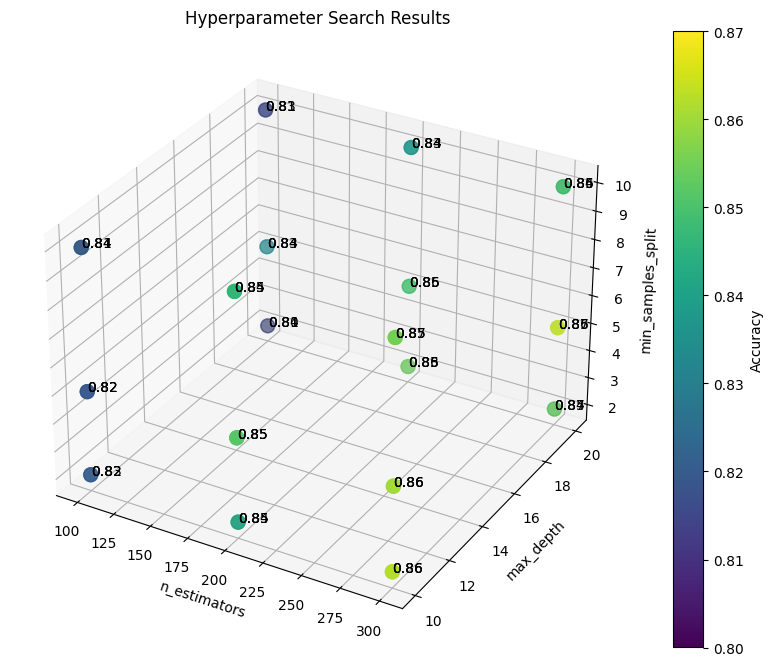

In [ ]:
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
sc = ax.scatter(results['n_estimators'], results['max_depth'], results['min_samples_split'],
                c=results['accuracy'], cmap='viridis', s=100)
plt.colorbar(sc, ax=ax, label='Accuracy')
ax.set_xlabel('n_estimators')
ax.set_ylabel('max_depth')
ax.set_zlabel('min_samples_split')
plt.title('Hyperparameter Search Results')

for i, row in results.iterrows():
    ax.text(row['n_estimators'], row['max_depth'], row['min_samples_split'],
            f'{row["accuracy"]:.2f}', color='black', fontsize=10)

plt.show()


In [ ]:
import joblib

best_model = joblib.load('best_rf_model.joblib')

sample_review = "This movie is boring! I hate every minute of it."

sample_review_tfidf = tfidf_vectorizer.transform([sample_review])

predicted_sentiment = best_model.predict(sample_review_tfidf)

print("Predicted Sentiment:", predicted_sentiment)


Predicted Sentiment: ['negative']


In [ ]:


best_model = joblib.load('best_svm_model.joblib')

sample_review = "This movie is amazing! I love every minute of it."

sample_review_tfidf = tfidf_vectorizer.transform([sample_review])

predicted_sentiment = best_model.predict(sample_review_tfidf)

print("Predicted Sentiment:", predicted_sentiment)


Predicted Sentiment: ['positive']


C=0.001, penalty=l1, solver=liblinear: Test Accuracy = 0.49
C=0.001, penalty=l1, solver=saga: Test Accuracy = 0.51
C=0.001, penalty=l2, solver=liblinear: Test Accuracy = 0.50
C=0.001, penalty=l2, solver=saga: Test Accuracy = 0.49
C=0.01, penalty=l1, solver=liblinear: Test Accuracy = 0.49
C=0.01, penalty=l1, solver=saga: Test Accuracy = 0.49
C=0.01, penalty=l2, solver=liblinear: Test Accuracy = 0.74
C=0.01, penalty=l2, solver=saga: Test Accuracy = 0.75
C=0.1, penalty=l1, solver=liblinear: Test Accuracy = 0.49
C=0.1, penalty=l1, solver=saga: Test Accuracy = 0.49
C=0.1, penalty=l2, solver=liblinear: Test Accuracy = 0.82
C=0.1, penalty=l2, solver=saga: Test Accuracy = 0.82
C=1, penalty=l1, solver=liblinear: Test Accuracy = 0.80
C=1, penalty=l1, solver=saga: Test Accuracy = 0.80
C=1, penalty=l2, solver=liblinear: Test Accuracy = 0.86
C=1, penalty=l2, solver=saga: Test Accuracy = 0.86
C=10, penalty=l1, solver=liblinear: Test Accuracy = 0.83


/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


C=10, penalty=l1, solver=saga: Test Accuracy = 0.85
C=10, penalty=l2, solver=liblinear: Test Accuracy = 0.88
C=10, penalty=l2, solver=saga: Test Accuracy = 0.88
C=100, penalty=l1, solver=liblinear: Test Accuracy = 0.83


/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


C=100, penalty=l1, solver=saga: Test Accuracy = 0.87
C=100, penalty=l2, solver=liblinear: Test Accuracy = 0.86


/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


C=100, penalty=l2, solver=saga: Test Accuracy = 0.87
Best model saved with accuracy: 0.88


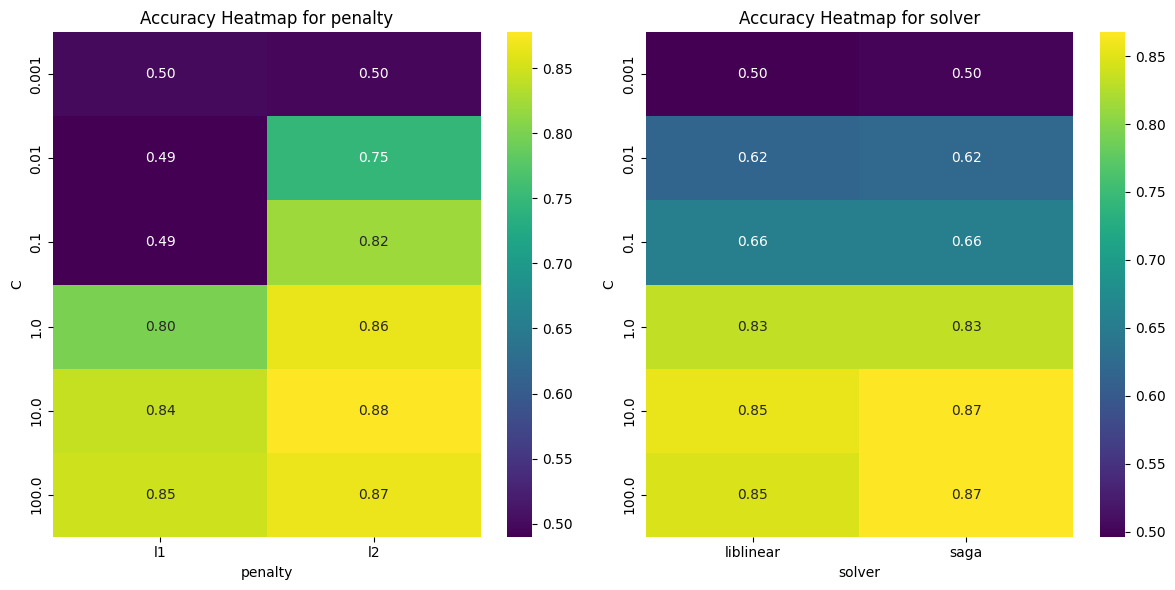

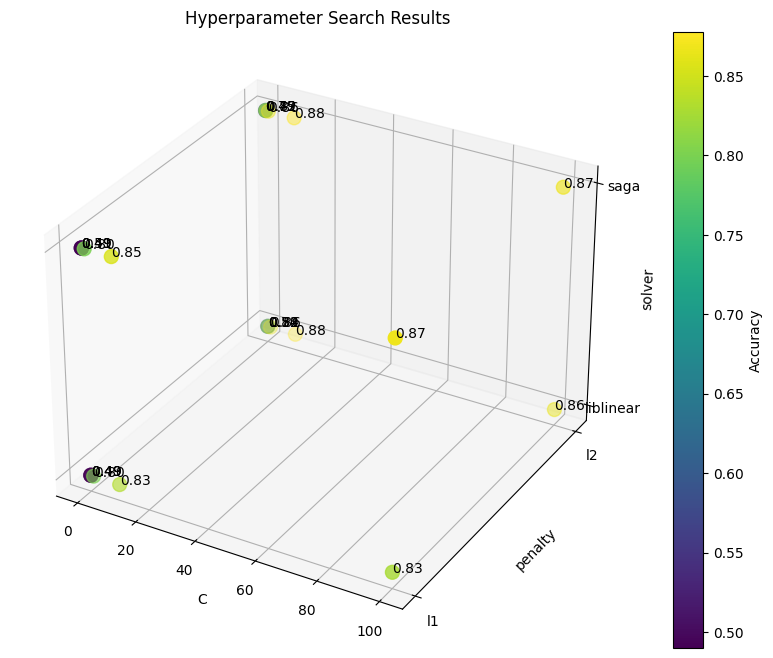

In [ ]:


param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga']
}

C_values = []
penalty_values = []
solver_values = []
accuracy_scores = []

best_accuracy = 0
best_model = None

for params in product(*param_grid.values()):
    C, penalty, solver = params

    lr_model = LogisticRegression(C=C, penalty=penalty, solver=solver, random_state=42)
    lr_model.fit(X_train_tfidf, y_train)

    y_test_pred_lr = lr_model.predict(X_test_tfidf)
    accuracy_test_lr = accuracy_score(y_test, y_test_pred_lr)

    print(f"C={C}, penalty={penalty}, solver={solver}: Test Accuracy = {accuracy_test_lr:.2f}")

    C_values.append(C)
    penalty_values.append(penalty)
    solver_values.append(solver)
    accuracy_scores.append(accuracy_test_lr)

    if accuracy_test_lr > best_accuracy:
        best_accuracy = accuracy_test_lr
        best_model = lr_model

joblib.dump(best_model, 'best_lr_model.joblib')
print(f"Best model saved with accuracy: {best_accuracy:.2f}")

# Create a DataFrame from the collected data
results = pd.DataFrame({
    'C': C_values,
    'penalty': penalty_values,
    'solver': solver_values,
    'accuracy': accuracy_scores
})

fig, axes = plt.subplots(1, 2, figsize=(12, 6))
for i, param in enumerate(['penalty', 'solver']):
    pivot_table = results.pivot_table(index='C', columns=param, values='accuracy')
    sns.heatmap(pivot_table, annot=True, fmt=".2f", cmap="viridis", ax=axes[i])
    axes[i].set_title(f'Accuracy Heatmap for {param}')
    axes[i].set_xlabel(param)
    axes[i].set_ylabel('C')
plt.tight_layout()
plt.show()

param_map = {'l1': 0, 'l2': 1, 'liblinear': 0, 'saga': 1}
results['penalty_num'] = results['penalty'].map(param_map)
results['solver_num'] = results['solver'].map(param_map)

fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
sc = ax.scatter(results['C'], results['penalty_num'], results['solver_num'],
                c=results['accuracy'], cmap='viridis', s=100)
plt.colorbar(sc, ax=ax, label='Accuracy')
ax.set_xlabel('C')
ax.set_ylabel('penalty')
ax.set_zlabel('solver')
ax.set_yticks([0, 1])
ax.set_yticklabels(['l1', 'l2'])
ax.set_zticks([0, 1])
ax.set_zticklabels(['liblinear', 'saga'])
plt.title('Hyperparameter Search Results')

for i, row in results.iterrows():
    ax.text(row['C'], row['penalty_num'], row['solver_num'],
            f'{row["accuracy"]:.2f}', color='black', fontsize=10)

plt.show()



In [ ]:


best_model = joblib.load('best_lr_model.joblib')

sample_review = "This movie is borin! I hate every minute of it."

sample_review_tfidf = tfidf_vectorizer.transform([sample_review])

predicted_sentiment = best_model.predict(sample_review_tfidf)

print("Predicted Sentiment:", predicted_sentiment)


Predicted Sentiment: ['negative']


In [ ]:


best_model = joblib.load('best_lr_model.joblib')

sample_review = "This movie is amazing! I love every minute of it."

sample_review_tfidf = tfidf_vectorizer.transform([sample_review])

predicted_sentiment = best_model.predict(sample_review_tfidf)

print("Predicted Sentiment:", predicted_sentiment)


Predicted Sentiment: ['positive']


n_estimators=50, learning_rate=0.01, max_depth=3: Test Accuracy = 0.70
n_estimators=50, learning_rate=0.01, max_depth=5: Test Accuracy = 0.71
n_estimators=50, learning_rate=0.01, max_depth=7: Test Accuracy = 0.71
n_estimators=50, learning_rate=0.1, max_depth=3: Test Accuracy = 0.78
n_estimators=50, learning_rate=0.1, max_depth=5: Test Accuracy = 0.79
n_estimators=50, learning_rate=0.1, max_depth=7: Test Accuracy = 0.79
n_estimators=50, learning_rate=0.2, max_depth=3: Test Accuracy = 0.79
n_estimators=50, learning_rate=0.2, max_depth=5: Test Accuracy = 0.80
n_estimators=50, learning_rate=0.2, max_depth=7: Test Accuracy = 0.80
n_estimators=100, learning_rate=0.01, max_depth=3: Test Accuracy = 0.71
n_estimators=100, learning_rate=0.01, max_depth=5: Test Accuracy = 0.72
n_estimators=100, learning_rate=0.01, max_depth=7: Test Accuracy = 0.73
n_estimators=100, learning_rate=0.1, max_depth=3: Test Accuracy = 0.81
n_estimators=100, learning_rate=0.1, max_depth=5: Test Accuracy = 0.81
n_estimat

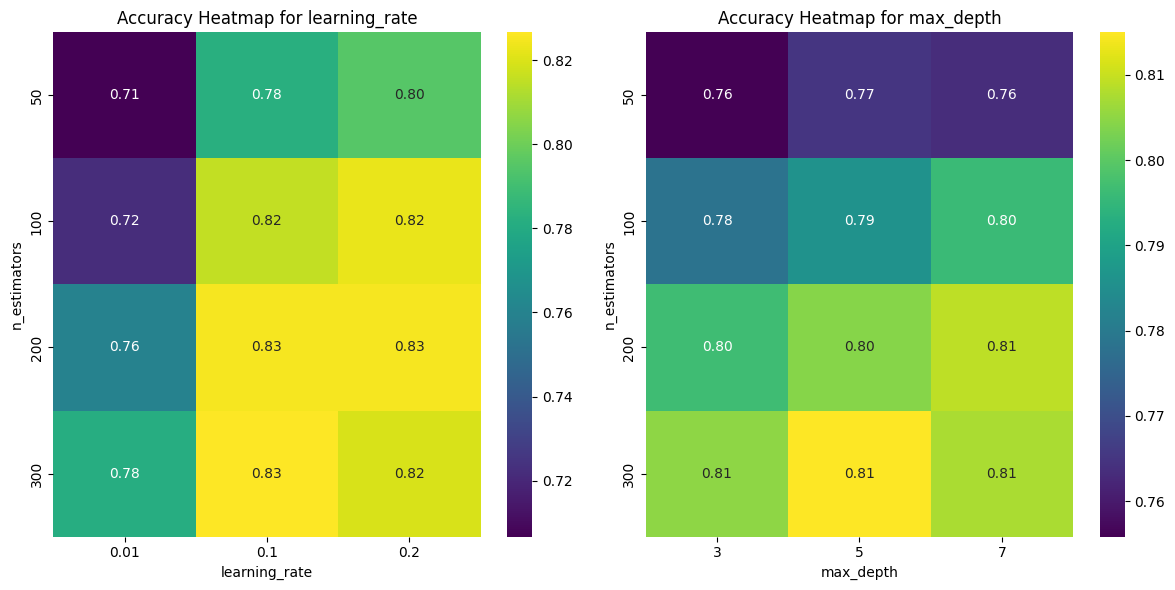

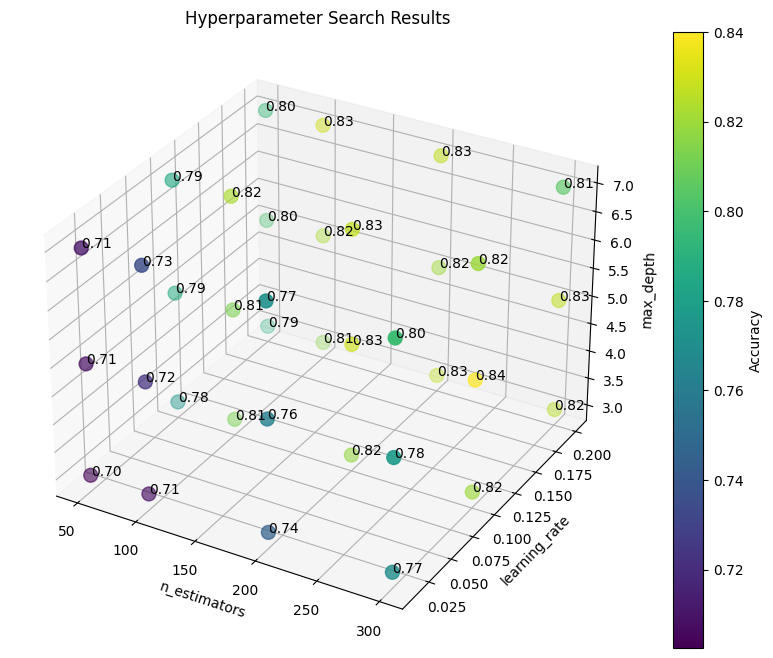

In [ ]:
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(target_)


X_train, X_test, y_train, y_test = train_test_split(data, y_encoded, test_size=0.2, random_state=42)


tfidf_vectorizer = TfidfVectorizer(max_features=5000)
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

param_grid = {
    'n_estimators': [50, 100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7]
}

n_estimators_values = []
learning_rate_values = []
max_depth_values = []
accuracy_scores = []

best_accuracy = 0
best_model = None

for params in product(*param_grid.values()):
    n_estimators, learning_rate, max_depth = params

    xgb_model = XGBClassifier(n_estimators=n_estimators, learning_rate=learning_rate, max_depth=max_depth, random_state=42)  
    xgb_model.fit(X_train_tfidf, y_train)

    y_test_pred_xgb = xgb_model.predict(X_test_tfidf)
    accuracy_test_xgb = accuracy_score(y_test, y_test_pred_xgb)

    print(f"n_estimators={n_estimators}, learning_rate={learning_rate}, max_depth={max_depth}: Test Accuracy = {accuracy_test_xgb:.2f}")

    n_estimators_values.append(n_estimators)
    learning_rate_values.append(learning_rate)
    max_depth_values.append(max_depth)
    accuracy_scores.append(accuracy_test_xgb)

    if accuracy_test_xgb > best_accuracy:
        best_accuracy = accuracy_test_xgb
        best_model = xgb_model

joblib.dump(best_model, 'best_xgb_model.joblib')
print(f"Best model saved with accuracy: {best_accuracy:.2f}")

results = pd.DataFrame({
    'n_estimators': n_estimators_values,
    'learning_rate': learning_rate_values,
    'max_depth': max_depth_values,
    'accuracy': accuracy_scores
})

fig, axes = plt.subplots(1, 2, figsize=(12, 6))
for i, param in enumerate(['learning_rate', 'max_depth']):
    pivot_table = results.pivot_table(index='n_estimators', columns=param, values='accuracy')
    sns.heatmap(pivot_table, annot=True, fmt=".2f", cmap="viridis", ax=axes[i])
    axes[i].set_title(f'Accuracy Heatmap for {param}')
    axes[i].set_xlabel(param)
    axes[i].set_ylabel('n_estimators')
plt.tight_layout()
plt.show()

fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
sc = ax.scatter(results['n_estimators'], results['learning_rate'], results['max_depth'],
                c=results['accuracy'], cmap='viridis', s=100)
plt.colorbar(sc, ax=ax, label='Accuracy')
ax.set_xlabel('n_estimators')
ax.set_ylabel('learning_rate')
ax.set_zlabel('max_depth')
plt.title('Hyperparameter Search Results')

for i, row in results.iterrows():
    ax.text(row['n_estimators'], row['learning_rate'], row['max_depth'],
            f'{row["accuracy"]:.2f}', color='black', fontsize=10)

plt.show()
